## Import libraries

In [1]:
# NBVAL_IGNORE_OUTPUT
# ^this is a magic comment to work around this issue https://github.com/ebmdatalab/custom-docker/issues/10
from change_detection import functions as chg
from lib.outliers import *  #This is copied into the local folder from a branch ebmdatalab pandas library - it will be placed in its own repo to install at a later dat

/home/app/notebook/lib/outliers.py:11: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


## Run OpenPrescribing Change Detection on Lidocaine Measure for CCGs

In [2]:
# NBVAL_IGNORE_OUTPUT
# ^this is a magic comment to work around this issue https://github.com/ebmdatalab/custom-docker/issues/10
lidocaine_class = chg.ChangeDetection('ccg_data_lplido%',
                                    measure=True,
                                    direction='down',
                                    use_cache=True,
                                    overwrite=False,
                                    verbose=False,
                                    draw_figures='no')
lidocaine_class.run()

## Import results

In [3]:
lidocaine = lidocaine_class.concatenate_outputs()
lidocaine.head()

is.nbreak  is.tfirst  is.tfirst.pknown  \
measure              name                                           
ccg_data_lplidocaine 00C   2          20.0       20.0               
                     00D   5          14.0       14.0               
                     00J   2          17.0       17.0               
                     00K   2          19.0       19.0               
                     00L   6          16.0       16.0               

                           is.tfirst.pknown.offs  is.tfirst.offs  \
measure              name                                          
ccg_data_lplidocaine 00C   20.0                   20.0             
                     00D   17.0                   17.0             
                     00J   17.0                   17.0             
                     00K   19.0                   19.0             
                     00L   28.0                   28.0             

                           is.tfirst.big  is.slope.ma  is.slope.ma.prop  \
measure              name                                                 
ccg_data_lplidocaine 00C   20.0          -1.201541    -0.009604           
                     00D   17.0          -9.760594    -0.099652           
                     00J   17.0          -5.927963    -0.056012           
                     00K   19.0          -0.133067    -0.003073           
                     00L   34.0          -0.997343    -0.037921           

                           is.slope.ma.prop.lev  is.intlev.initlev  \
measure              name                                            
ccg_data_lplidocaine 00C   0.512195              126.315378          
                     00D   0.623492              104.553810          
                     00J   0.547592              111.761149          
                     00K   0.523810              43.440774           
                     00L   0.558819              28.008975           

                           is.intlev.finallev  is.intlev.levd  \
measure              name                                       
ccg_data_lplidocaine 00C   77.052210           49.263168        
                     00D   26.280213           78.273598        
                     00J   46.808102           64.953048        
                     00K   37.851952           5.588822         
                     00L   11.946381           16.062593        

                           is.intlev.levdprop  
measure              name                      
ccg_data_lplidocaine 00C   0.390001            
                     00D   0.748644            
                     00J   0.581177            
                     00K   0.128654            
                     00L   0.573480

## Results
Column includes CCG Name (hyperlinked to OP website), month when change started, mean proprotional change and a plot

These are filtered:

- to only include practices that started within the highest 20% of all practices
- to remove any practices that have a short sudden spike that would lead the change detection algorithm to detect a sudden drop
  and then sorted according to the largest total measured drop.

,Month when change detected,Measured proportional change,plots
link,,,
NHS BROMLEY CCG,2017-06-01,0.635975,
NHS LAMBETH CCG,2017-12-01,0.558819,
NHS BRADFORD DISTRICTS CCG,2017-11-01,0.473161,
NHS HALTON CCG,2018-07-01,0.451273,
NHS DARLINGTON CCG,2016-08-01,0.390001,
NHS HAMMERSMITH AND FULHAM CCG,2017-12-01,0.331620,
NHS SOUTHPORT AND FORMBY CCG,2017-12-01,0.190196,
NHS SOUTH SEFTON CCG,2017-07-01,0.126829,
NHS WIRRAL CCG,2017-06-01,0.036367,

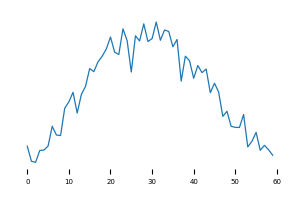
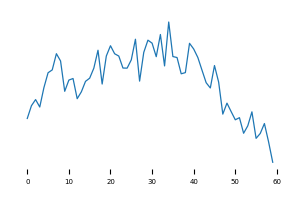
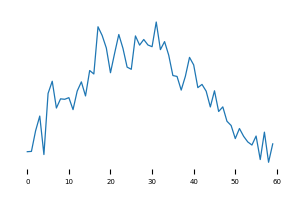
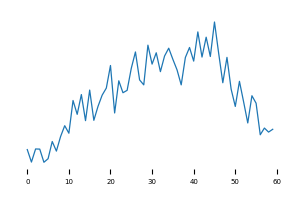
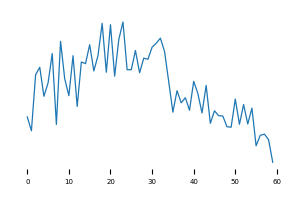
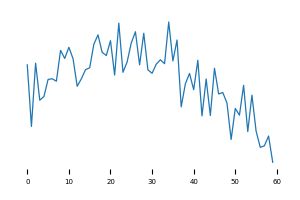
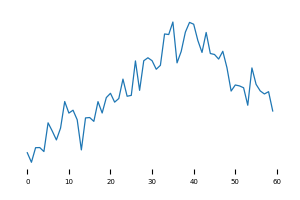
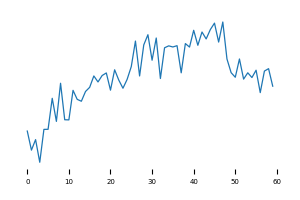
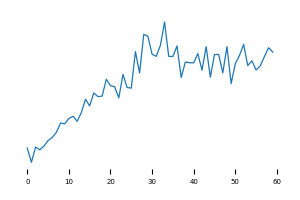
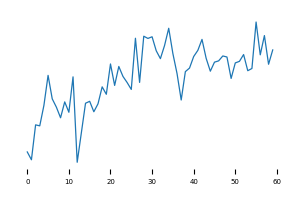

In [4]:
filtered_sparkline(lidocaine,
                  'ccg_data_lplido/ccg_data_lplidocaine',
                  'ccg_data_lplidocaine')